# Final exam of Image Processing and analysis


In [1]:
# Import the required tools
from matplotlib import pyplot as plt
import numpy as np
import cv2

## Part 1 : Introduction

1. Read and display the image rice.tif

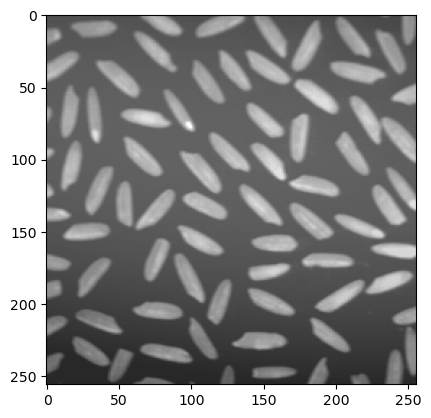

In [2]:
image = cv2.imread('rice.tif')
plt.imshow(image);

2. Which is the format of the image. Convert it to a graylevel image if it is not

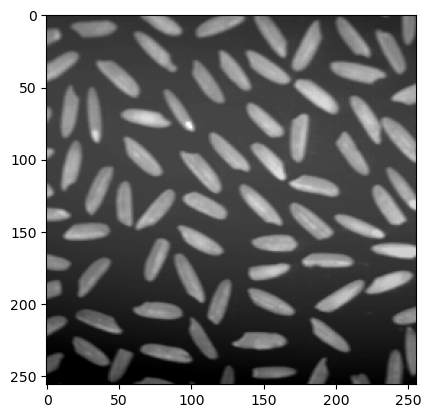

In [3]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray');

3. Draw the histogram of the image rice

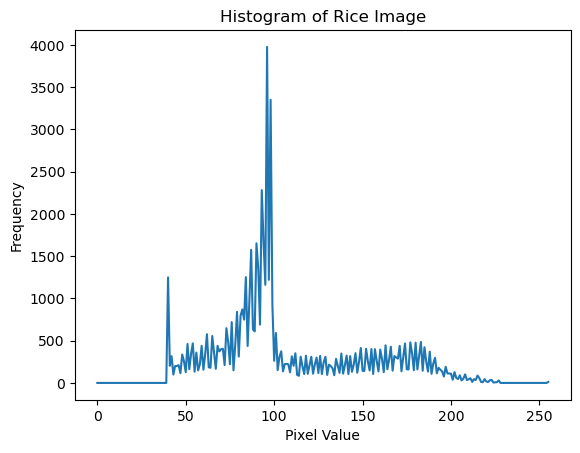

In [4]:
hist_1 = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.plot(hist_1)
plt.title('Histogram of Rice Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

4. Folowing this histogram, how many clusters could we deduce from the image? Is it conform to the visual aspect of the image having a background and the object (rice)?

## Part 2 : Image Processing

5. Consider that our image is basically not perfect, carry out histogram equalization on the image rice. What is the impact of this processing, is the image visually better?

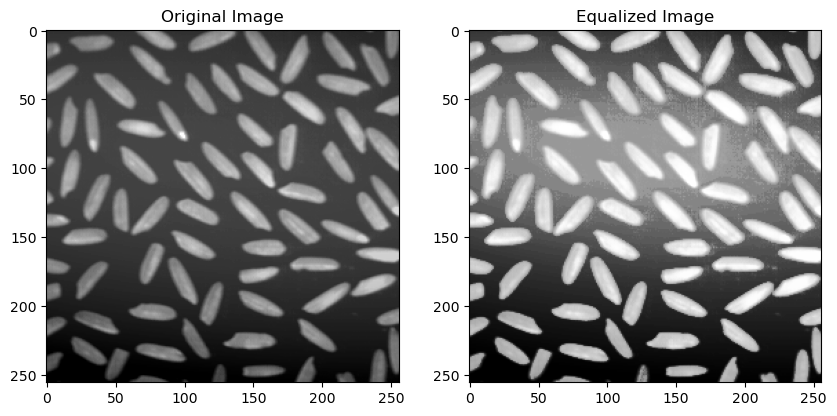

In [5]:
equalized_image = cv2.equalizeHist(gray_image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

plt.show()


6. Add 2% of salt and pepper noise and display the noised image.

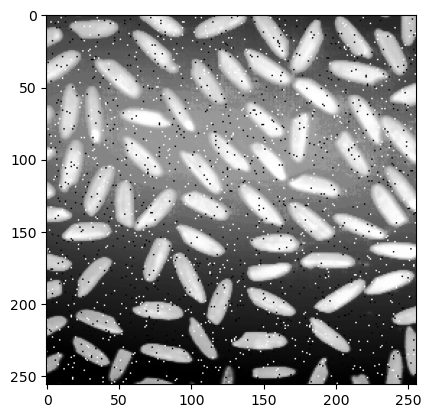

In [6]:
def salt_and_pepper_noise(img,p):
    
    mask = (np.random.randint(100,size=img.shape)>p)
    
    new_img = np.random.randint(2,size = img.shape)*255
    
    new_img[mask] = img[mask]
    return new_img.astype(np.uint8)

img_salt = salt_and_pepper_noise(equalized_image, 2)
plt.imshow(img_salt,cmap='gray');

7. Draw again the histogram of the noised image and evaluate again the number of clusters. What do you thing about this noise? 

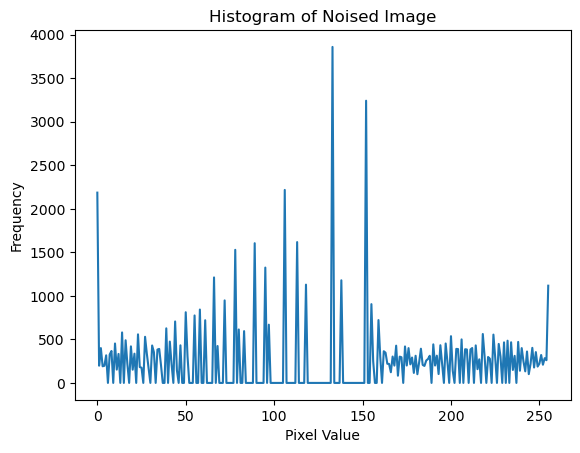

In [7]:
hist_noised = cv2.calcHist([img_salt], [0], None, [256], [0, 256])

plt.plot(hist_noised)
plt.title('Histogram of Noised Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()


8. Apply two filters to the noised image : an average filter and another one you judge convenient. Display the reslut of the two filtered images. 

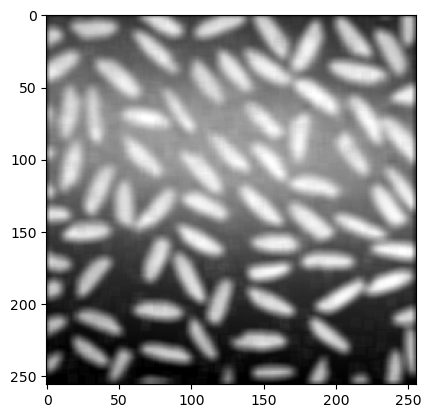

In [8]:
# Mean filter

def mean_filter(image, kernel_size):
    height, width = image.shape[:2]
    
    filtered_image = np.zeros_like(image)
    
    pad = kernel_size // 2
    
    padded_image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_CONSTANT)
    
    for i in range(pad, height + pad):
        for j in range(pad, width + pad):
            region = padded_image[i - pad:i + pad + 1, j - pad:j + pad + 1]
            
            filtered_image[i - pad, j - pad] = np.mean(region)
    
    return filtered_image

mean_filtered_image = mean_filter(img_salt, 7)
plt.imshow(mean_filtered_image,cmap='gray');

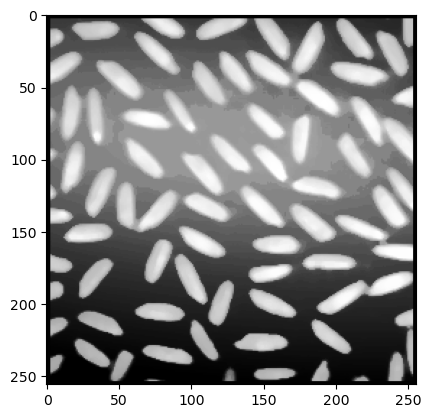

In [9]:
# median filter

from math import ceil
def median_filter(image, n):
  modified_image = np.ones([image.shape[0], image.shape[1]]).astype(int)
  for i in range(len(image)):
    for j in range(len(image[i])):
      if (i + n >= len(image)):
        break
      pixels = []
      for x in range(i, i + n):
        if (j + n >= len(image[i])):
          break
        for y in range(j, j + n):
          pixels.append(image[x][y])
      pixels.sort()
      x_y = ceil(n/2) - 2
      if (len(pixels) != 0):
        modified_image[x - x_y][y - x_y] = pixels[ceil(len(pixels)/2) - 1]
  return modified_image

median_filtered_image = median_filter(img_salt, 5)
plt.imshow(median_filtered_image,cmap='gray');

9. Display the histograms of the two filtered images. How many clusters you can deduce from these two histograms. Which filtering is more convenient with regard to the number of clusters on the original image (background and object)? 

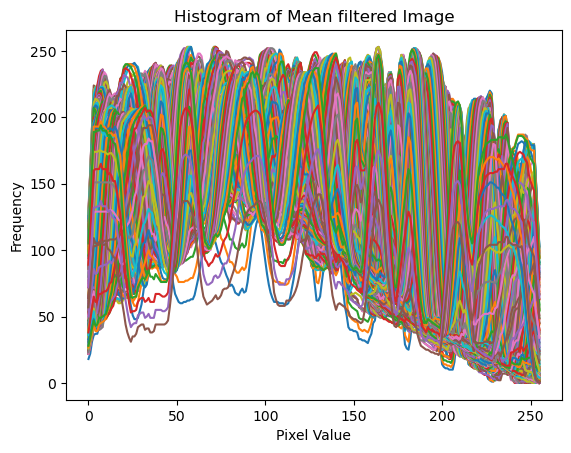

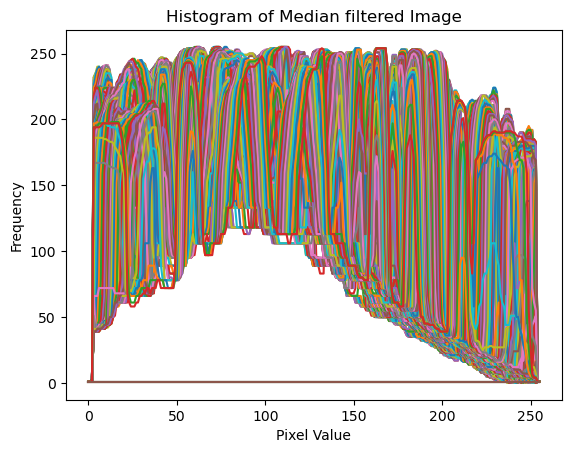

In [10]:
plt.plot(mean_filtered_image)
plt.title('Histogram of Mean filtered Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

plt.plot(median_filtered_image)
plt.title('Histogram of Median filtered Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

## Part 3 : The whole chain

10. Display on the same window the six images : 
- the original image, 
- the noised image, 
- the original after histogram equalization 
- the noised image after histogram equalization
- the two filterd images

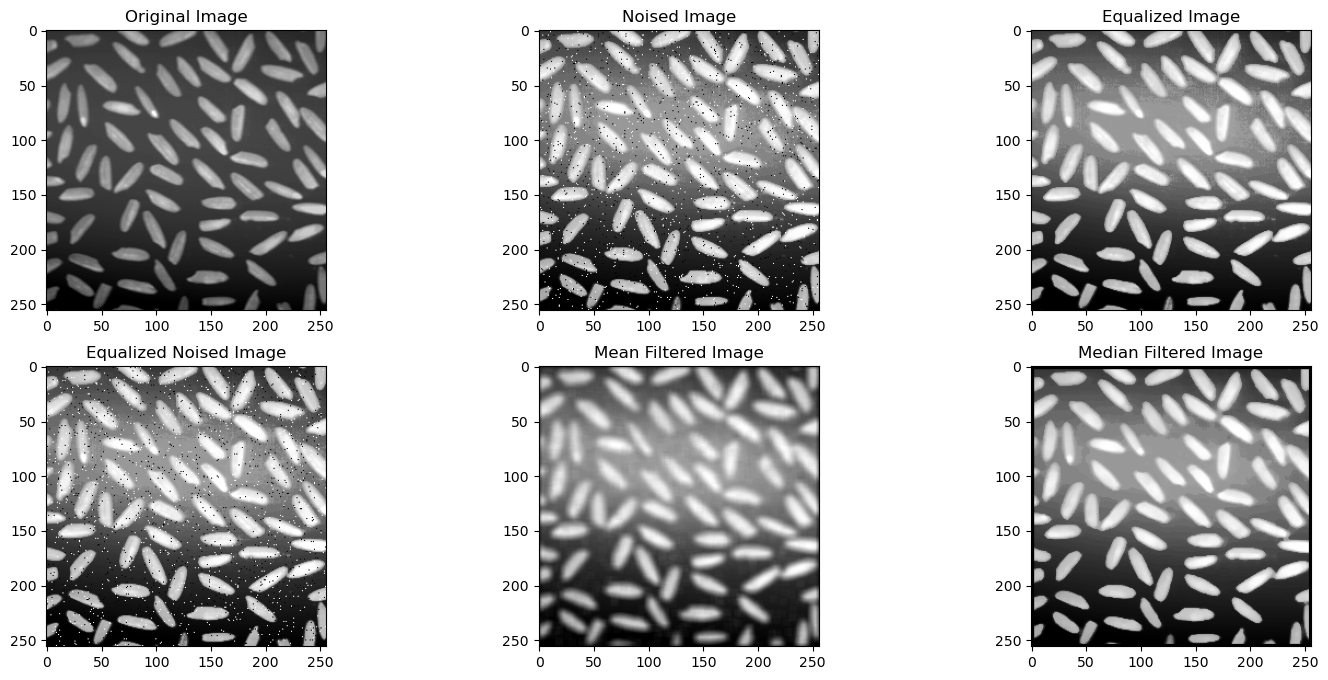

In [11]:
# Display all six images
plt.figure(figsize=(18, 8))

plt.subplot(2, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(img_salt, cmap='gray')
plt.title('Noised Image')

plt.subplot(2, 3, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')

img_salt_without_hq = salt_and_pepper_noise(equalized_image, 2)
plt.subplot(2, 3, 4)
plt.imshow(img_salt_without_hq, cmap='gray')
plt.title('Equalized Noised Image')

plt.subplot(2, 3, 5)
plt.imshow(mean_filtered_image, cmap='gray')
plt.title('Mean Filtered Image')

plt.subplot(2, 3, 6)
plt.imshow(median_filtered_image, cmap='gray')
plt.title('Median Filtered Image')

plt.show()


11. Analyse qualitatively the impact of the different processing. Wich one is more convenient, histogram enhancement or filtering? 

"Answer here"


12. Carry out edge detection on the 6 previous images and display the results again on the same window.

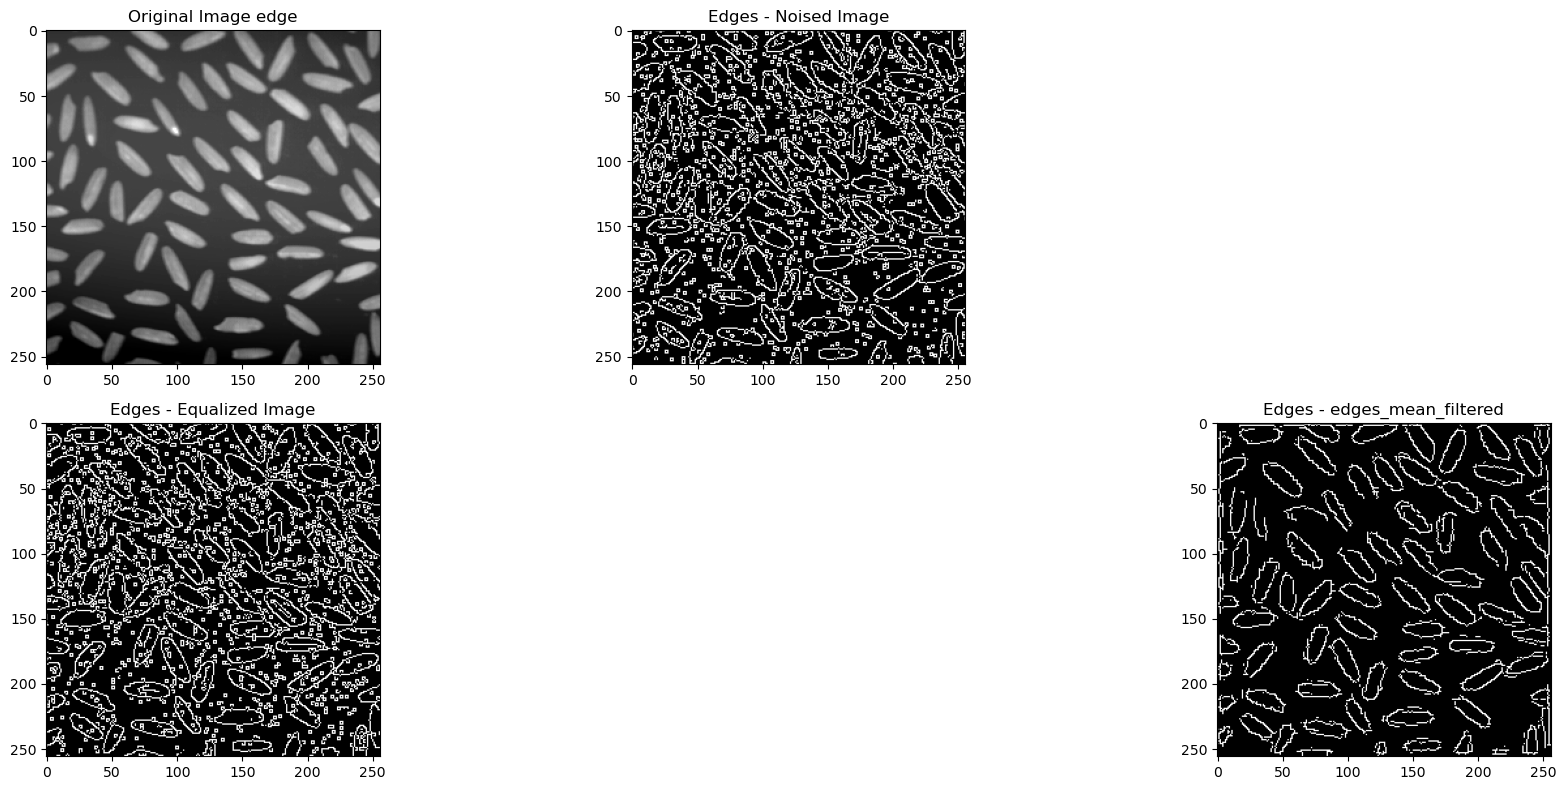

In [22]:
def apply_canny(image):
    edges1 = cv2.Canny(image, 50, 150)
    return edges1

plt.figure(figsize=(18, 8))

plt.subplot(2, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image edge')

plt.subplot(2, 3, 2)
edges_noised = apply_canny(img_salt)
plt.imshow(edges_noised, cmap='gray')
plt.title('Edges - Noised Image')

plt.subplot(2, 3, 4)
edges_equalized = apply_canny(equalized_image)
plt.imshow(edges_equalized, cmap='gray')
plt.title('Edges - Equalized Image')

plt.subplot(2, 3, 4)
edges_no_equalized = apply_canny(img_salt_without_hq)
plt.imshow(edges_no_equalized, cmap='gray')
plt.title('Edges - Equalized Image')

plt.subplot(2, 3, 6)
edges_mean_filtered = apply_canny(mean_filtered_image)
plt.imshow(edges_mean_filtered, cmap='gray')
plt.title('Edges - edges_mean_filtered')

plt.tight_layout()
plt.show()

13. Hold on (superimpose) each detected edges on the original image. Display the six superpositions in red in the same window. Is this result conform to the visual anlysis of question 11? 


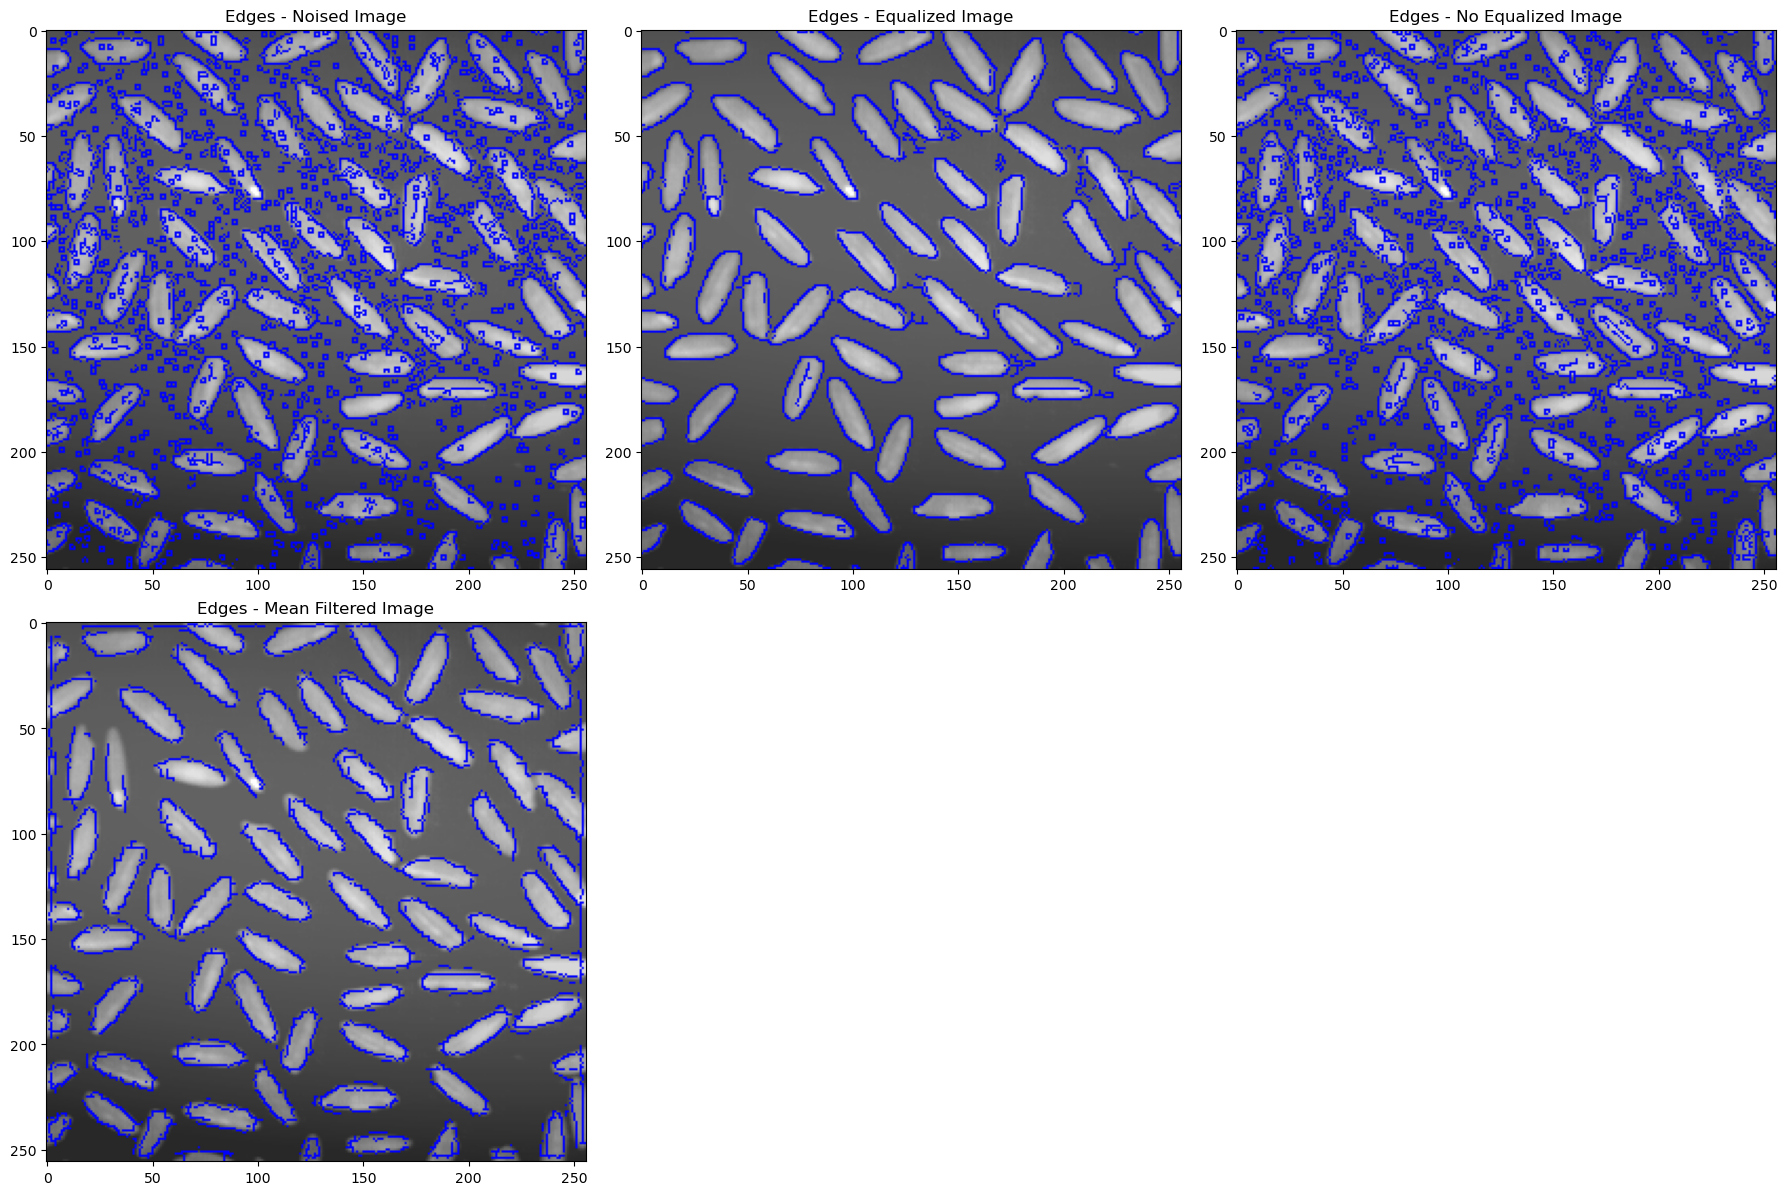

In [18]:
# Function to superimpose edges on the original image in red
def superimpose_edges(original_image, edges):
    superimposed = cv2.cvtColor(original_image, cv2.COLOR_GRAY2BGR)  # Convert to color if not already
    superimposed[edges > 0] = [0, 0, 255]  # Set the red channel to 255 where edges are detected
    return superimposed

# Superimpose edges on the original images
edges_on_original_noised = superimpose_edges(gray_image, edges_noised)
edges_on_original_equalized = superimpose_edges(gray_image, edges_equalized)
edges_on_original_no_equalized = superimpose_edges(gray_image, edges_no_equalized)
edges_on_original_mean_filtered = superimpose_edges(gray_image, edges_mean_filtered)

# Display the results in a single window
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plt.imshow(edges_on_original_noised)
plt.title('Edges - Noised Image')

plt.subplot(2, 3, 2)
plt.imshow(edges_on_original_equalized)
plt.title('Edges - Equalized Image')

plt.subplot(2, 3, 3)
plt.imshow(edges_on_original_no_equalized)
plt.title('Edges - No Equalized Image')

plt.subplot(2, 3, 4)
plt.imshow(edges_on_original_mean_filtered)
plt.title('Edges - Mean Filtered Image')



plt.tight_layout()
plt.show()


NB : Send me the pdf, HTML and ipynb files. The name of the file should contain you name.